## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# For reproducibility
np.random.seed(42)

## 2. Understanding Linear Regression

### Theory
Linear regression models the relationship between:
- **Dependent variable** (y): Target we want to predict
- **Independent variables** (X): Features used for prediction

**Formula**: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$

Where:
- $\beta_0$: Intercept
- $\beta_i$: Coefficients for each feature
- $\epsilon$: Error term

**Goal**: Minimize the cost function (Mean Squared Error):

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

## 3. Simple Linear Regression Example

In [2]:
# Create simple synthetic data
X_simple = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y_simple = 2 * X_simple.flatten() + 1 + np.random.randn(10) * 2  # y = 2x + 1 + noise

# Create and train model
model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)

# Make predictions
y_pred_simple = model_simple.predict(X_simple)

# Print model parameters
print(f"Intercept (β₀): {model_simple.intercept_:.2f}")
print(f"Coefficient (β₁): {model_simple.coef_[0]:.2f}")
print(f"\nTrue equation: y = 2x + 1")
print(f"Learned equation: y = {model_simple.coef_[0]:.2f}x + {model_simple.intercept_:.2f}")

Intercept (β₀): 1.97
Coefficient (β₁): 1.99

True equation: y = 2x + 1
Learned equation: y = 1.99x + 1.97


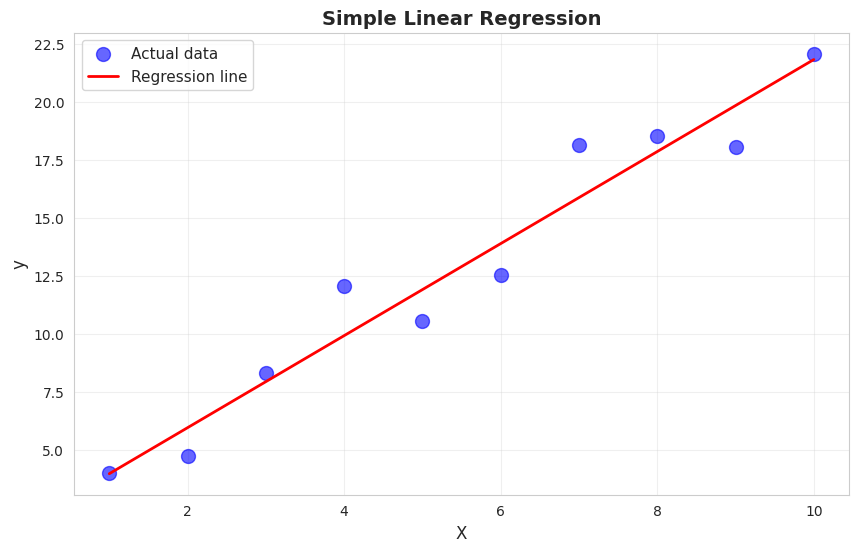

In [3]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, color='blue', label='Actual data', s=100, alpha=0.6)
plt.plot(X_simple, y_pred_simple, color='red', linewidth=2, label='Regression line')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Simple Linear Regression', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

## 4. Multiple Linear Regression with Real Data

Let's use the California Housing dataset to predict house prices.

In [4]:
# Load California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

print("Dataset Shape:", X.shape)
print("\nFeatures:", housing.feature_names)
print("\nTarget: Median house value (in $100,000s)")
print("\nFirst 5 rows:")
display(X.head())

Dataset Shape: (20640, 8)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target: Median house value (in $100,000s)

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# Basic statistics
print("Dataset Statistics:")
display(X.describe())

print("\nTarget Statistics:")
print(f"Mean: ${y.mean() * 100000:.2f}")
print(f"Median: ${np.median(y) * 100000:.2f}")
print(f"Min: ${y.min() * 100000:.2f}")
print(f"Max: ${y.max() * 100000:.2f}")

Dataset Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000



Target Statistics:
Mean: $206855.82
Median: $179700.00
Min: $14999.00
Max: $500001.00


## 5. Data Preprocessing

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set: {X_train.shape[0]/len(X)*100:.1f}%")
print(f"Testing set: {X_test.shape[0]/len(X)*100:.1f}%")

Training set size: 16512 samples
Testing set size: 4128 samples

Training set: 80.0%
Testing set: 20.0%


In [7]:
# Feature scaling (important for ridge regression and comparing coefficients)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print("\nScaled features have mean ≈ 0 and std ≈ 1")
print(f"Mean of first feature: {X_train_scaled[:, 0].mean():.6f}")
print(f"Std of first feature: {X_train_scaled[:, 0].std():.6f}")

Feature scaling completed!

Scaled features have mean ≈ 0 and std ≈ 1
Mean of first feature: -0.000000
Std of first feature: 1.000000


## 6. Train Linear Regression Model

In [8]:
# Create and train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

print("✅ Linear Regression model trained successfully!")

✅ Linear Regression model trained successfully!


## 7. Model Evaluation Metrics

In [9]:
def evaluate_regression_model(y_true, y_pred, set_name=''):
    """
    Calculate and display regression metrics
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{'='*50}")
    print(f"{set_name} Metrics:")
    print(f"{'='*50}")
    print(f"Mean Squared Error (MSE):  {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE):  {mae:.4f}")
    print(f"R² Score:      {r2:.4f}")
    print(f"\nInterpretation:")
    print(f"- Average prediction error: ${rmse * 100000:.2f}")
    print(f"- Model explains {r2*100:.2f}% of variance")
    print()
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Evaluate on training set
train_metrics_lr = evaluate_regression_model(y_train, y_train_pred_lr, "Training Set")

# Evaluate on test set
test_metrics_lr = evaluate_regression_model(y_test, y_test_pred_lr, "Test Set")

Training Set Metrics:
Mean Squared Error (MSE):  0.5179
Root Mean Squared Error (RMSE): 0.7197
Mean Absolute Error (MAE):  0.5286
R² Score:      0.6126

Interpretation:
- Average prediction error: $71967.57
- Model explains 61.26% of variance

Test Set Metrics:
Mean Squared Error (MSE):  0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE):  0.5332
R² Score:      0.5758

Interpretation:
- Average prediction error: $74558.14
- Model explains 57.58% of variance



## 8. Feature Importance Analysis

Feature Importance (based on coefficients):
   Feature  Coefficient
  Latitude    -0.896929
 Longitude    -0.869842
    MedInc     0.854383
 AveBedrms     0.339259
  AveRooms    -0.294410
  HouseAge     0.122546
  AveOccup    -0.040829
Population    -0.002308


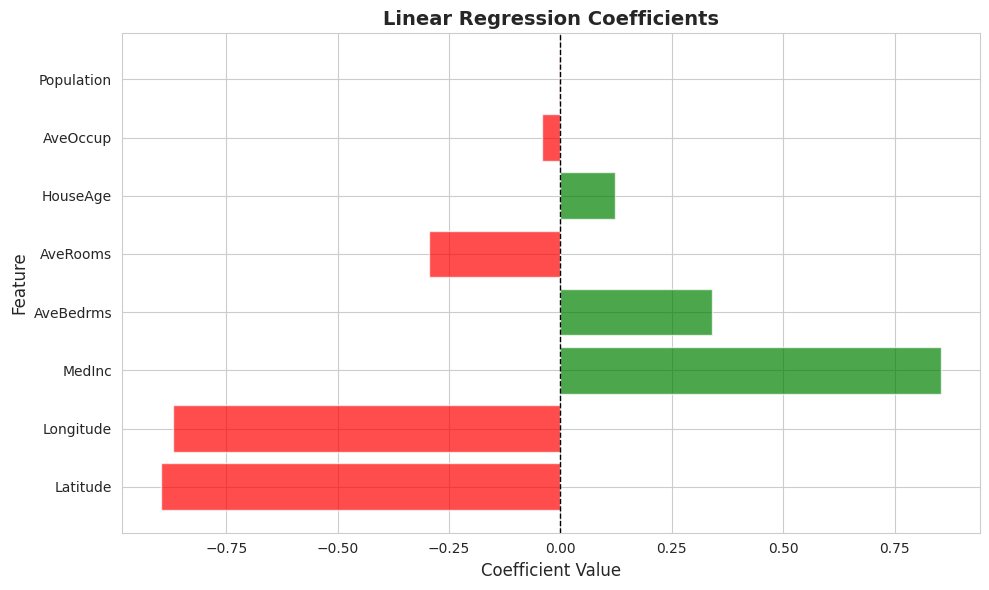

In [10]:
# Analyze feature coefficients
feature_importance = pd.DataFrame({
    'Feature': housing.feature_names,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("Feature Importance (based on coefficients):")
print(feature_importance.to_string(index=False))

# Visualize coefficients
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Linear Regression Coefficients', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

## 9. Ridge Regression (L2 Regularization)

### Theory
Ridge regression adds a penalty term to prevent overfitting:

$Cost = MSE + \alpha \sum_{i=1}^{n} \beta_i^2$

Where:
- $\alpha$: Regularization strength (hyperparameter)
- Higher $\alpha$ → stronger regularization → smaller coefficients

**Benefits**:
- Reduces overfitting
- Handles multicollinearity
- More stable predictions

In [11]:
# Train Ridge Regression with different alpha values
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_models = {}

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    ridge_models[alpha] = ridge_model
    
    # Evaluate
    y_test_pred = ridge_model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"Alpha = {alpha:6.2f} | R² = {r2:.4f} | RMSE = {rmse:.4f}")

Alpha =   0.01 | R² = 0.5758 | RMSE = 0.7456
Alpha =   0.10 | R² = 0.5758 | RMSE = 0.7456
Alpha =   1.00 | R² = 0.5758 | RMSE = 0.7456
Alpha =  10.00 | R² = 0.5761 | RMSE = 0.7453
Alpha = 100.00 | R² = 0.5778 | RMSE = 0.7438


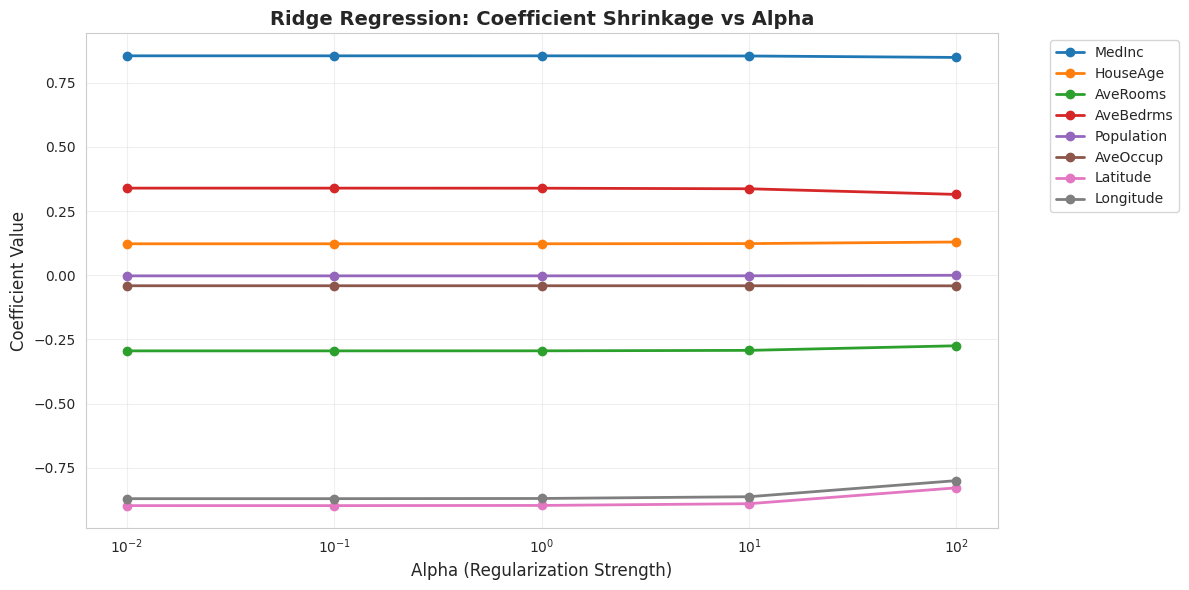


📊 Observation: As alpha increases, coefficients shrink toward zero


In [12]:
# Visualize how coefficients change with regularization
plt.figure(figsize=(12, 6))

for feature_idx, feature_name in enumerate(housing.feature_names):
    coef_values = [ridge_models[alpha].coef_[feature_idx] for alpha in alphas]
    plt.plot(alphas, coef_values, marker='o', label=feature_name, linewidth=2)

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.title('Ridge Regression: Coefficient Shrinkage vs Alpha', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Observation: As alpha increases, coefficients shrink toward zero")

## 10. Compare Linear vs Ridge Regression

In [13]:
# Train best ridge model (alpha=1.0 often works well)
ridge_best = Ridge(alpha=1.0)
ridge_best.fit(X_train_scaled, y_train)

# Predictions
y_test_pred_ridge = ridge_best.predict(X_test_scaled)

# Compare metrics
print("📊 LINEAR REGRESSION")
evaluate_regression_model(y_test, y_test_pred_lr, "Test Set")

print("\n📊 RIDGE REGRESSION (alpha=1.0)")
evaluate_regression_model(y_test, y_test_pred_ridge, "Test Set")

📊 LINEAR REGRESSION
Test Set Metrics:
Mean Squared Error (MSE):  0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE):  0.5332
R² Score:      0.5758

Interpretation:
- Average prediction error: $74558.14
- Model explains 57.58% of variance


📊 RIDGE REGRESSION (alpha=1.0)
Test Set Metrics:
Mean Squared Error (MSE):  0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE):  0.5332
R² Score:      0.5758

Interpretation:
- Average prediction error: $74555.67
- Model explains 57.58% of variance



{'MSE': 0.5558548589435971,
 'RMSE': np.float64(0.7455567442814779),
 'MAE': 0.5331931195789733,
 'R2': 0.5758157428913684}

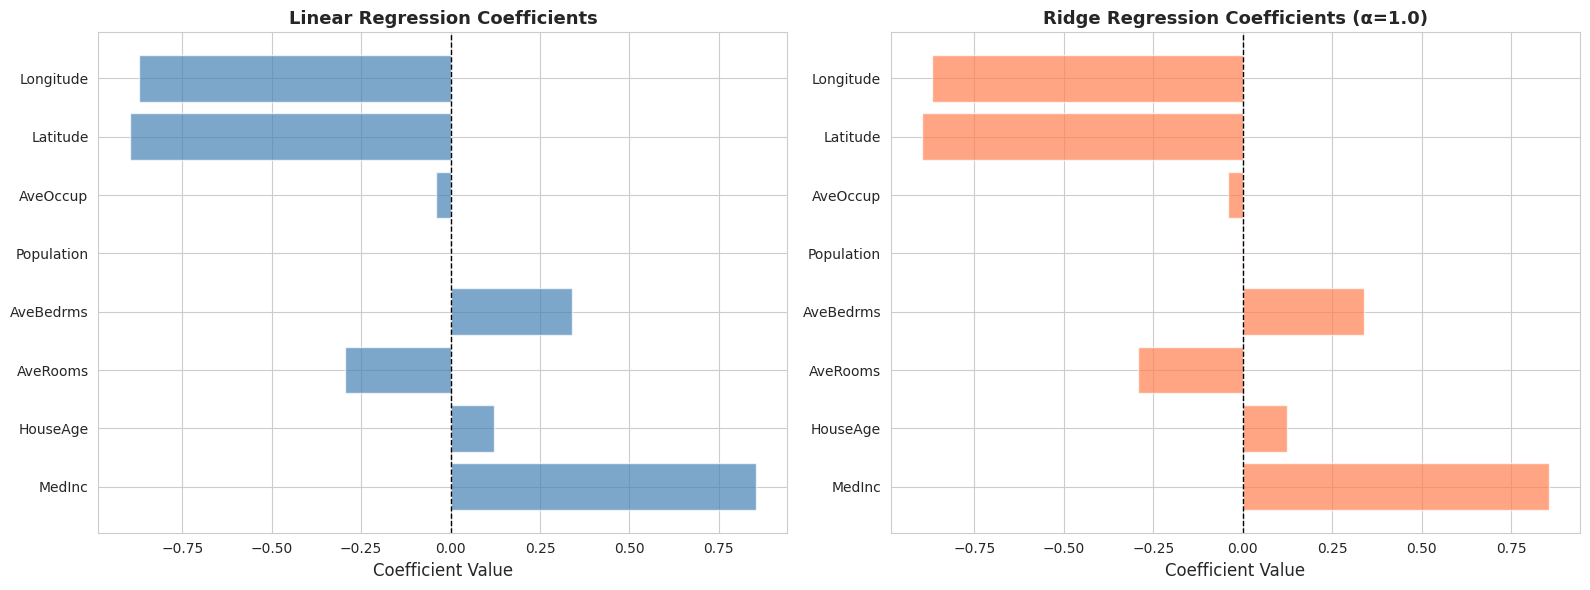


📌 Notice: Ridge coefficients are smaller (regularized)


In [14]:
# Visual comparison of coefficients
comparison_df = pd.DataFrame({
    'Feature': housing.feature_names,
    'Linear Regression': lr_model.coef_,
    'Ridge Regression': ridge_best.coef_
})

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression
axes[0].barh(comparison_df['Feature'], comparison_df['Linear Regression'], 
             color='steelblue', alpha=0.7)
axes[0].set_xlabel('Coefficient Value', fontsize=12)
axes[0].set_title('Linear Regression Coefficients', fontsize=13, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1)

# Ridge Regression
axes[1].barh(comparison_df['Feature'], comparison_df['Ridge Regression'], 
             color='coral', alpha=0.7)
axes[1].set_xlabel('Coefficient Value', fontsize=12)
axes[1].set_title('Ridge Regression Coefficients (α=1.0)', fontsize=13, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

print("\n📌 Notice: Ridge coefficients are smaller (regularized)")

## 11. Residual Analysis

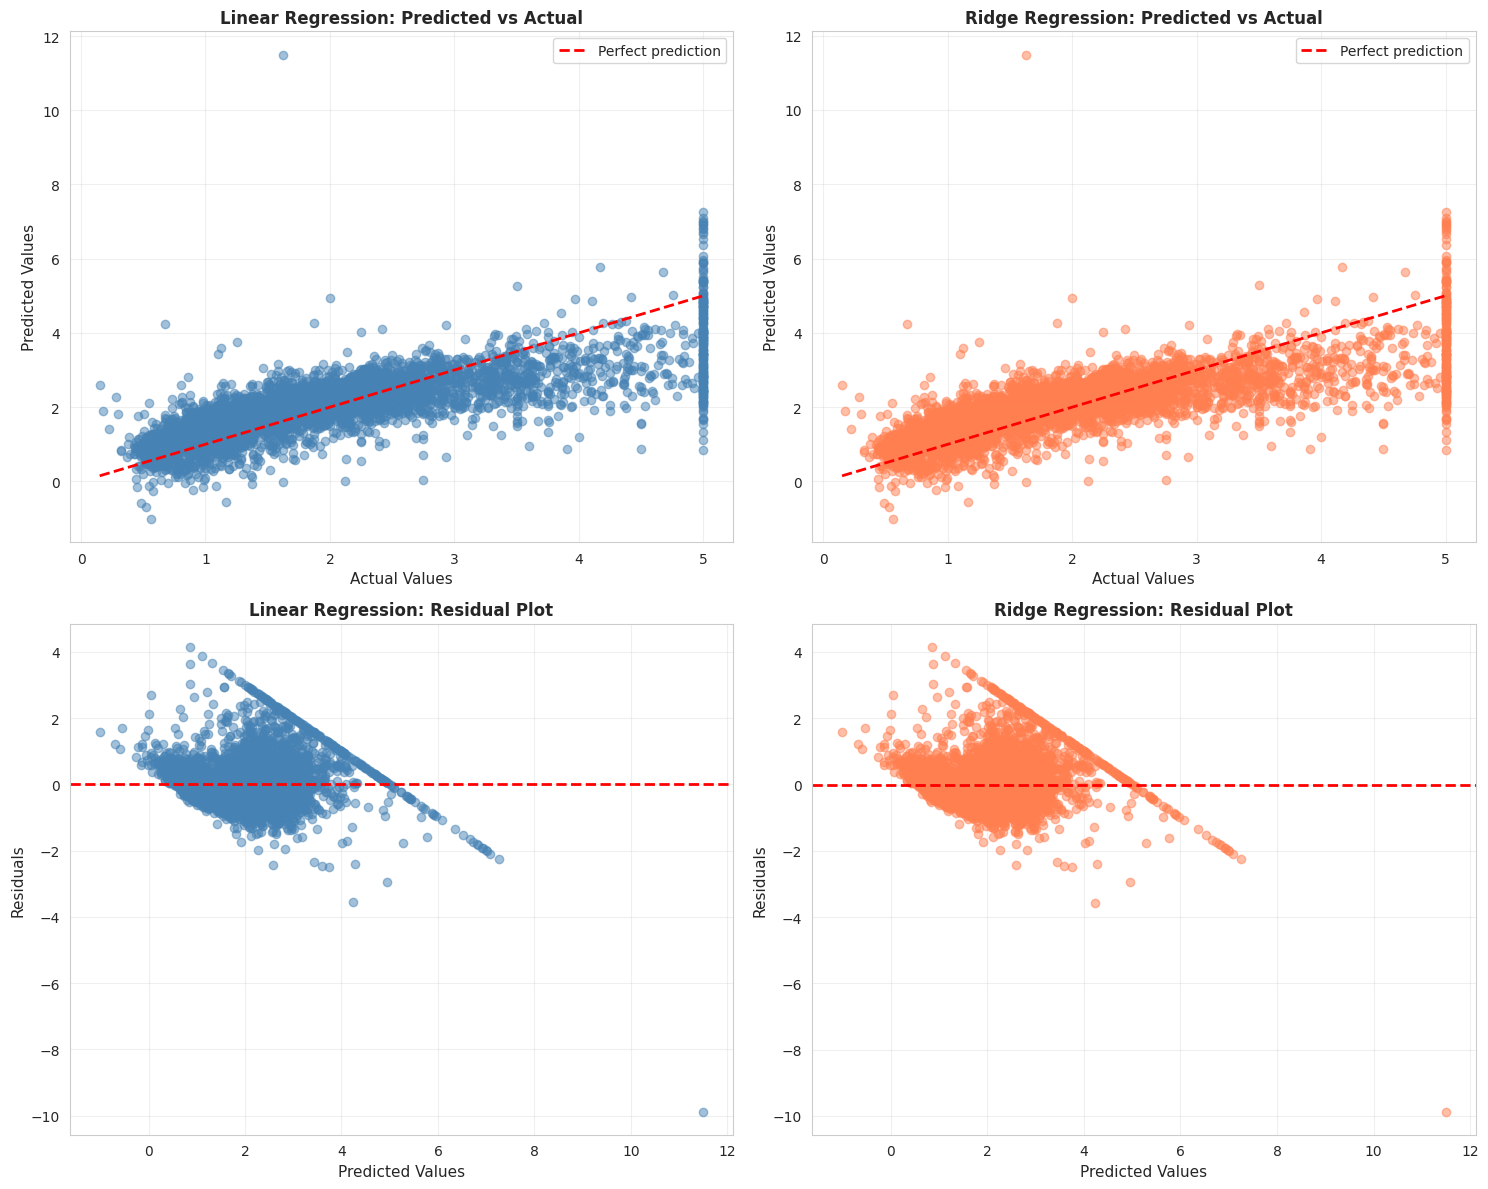


✅ Good residual plot: randomly scattered around zero
❌ Bad residual plot: shows patterns or trends


In [15]:
# Calculate residuals
residuals_lr = y_test - y_test_pred_lr
residuals_ridge = y_test - y_test_pred_ridge

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Linear Regression - Predicted vs Actual
axes[0, 0].scatter(y_test, y_test_pred_lr, alpha=0.5, color='steelblue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect prediction')
axes[0, 0].set_xlabel('Actual Values', fontsize=11)
axes[0, 0].set_ylabel('Predicted Values', fontsize=11)
axes[0, 0].set_title('Linear Regression: Predicted vs Actual', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Ridge Regression - Predicted vs Actual
axes[0, 1].scatter(y_test, y_test_pred_ridge, alpha=0.5, color='coral')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect prediction')
axes[0, 1].set_xlabel('Actual Values', fontsize=11)
axes[0, 1].set_ylabel('Predicted Values', fontsize=11)
axes[0, 1].set_title('Ridge Regression: Predicted vs Actual', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Linear Regression - Residual Plot
axes[1, 0].scatter(y_test_pred_lr, residuals_lr, alpha=0.5, color='steelblue')
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Values', fontsize=11)
axes[1, 0].set_ylabel('Residuals', fontsize=11)
axes[1, 0].set_title('Linear Regression: Residual Plot', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Ridge Regression - Residual Plot
axes[1, 1].scatter(y_test_pred_ridge, residuals_ridge, alpha=0.5, color='coral')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Values', fontsize=11)
axes[1, 1].set_ylabel('Residuals', fontsize=11)
axes[1, 1].set_title('Ridge Regression: Residual Plot', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Good residual plot: randomly scattered around zero")
print("❌ Bad residual plot: shows patterns or trends")

## 12. Cross-Validation

Cross-Validation Results (R² Score):

Linear Regression:
  Scores: [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
  Mean: 0.6115 (+/- 0.0129)

Ridge Regression:
  Scores: [0.62010998 0.61298705 0.61343295 0.61070059 0.60018886]
  Mean: 0.6115 (+/- 0.0129)


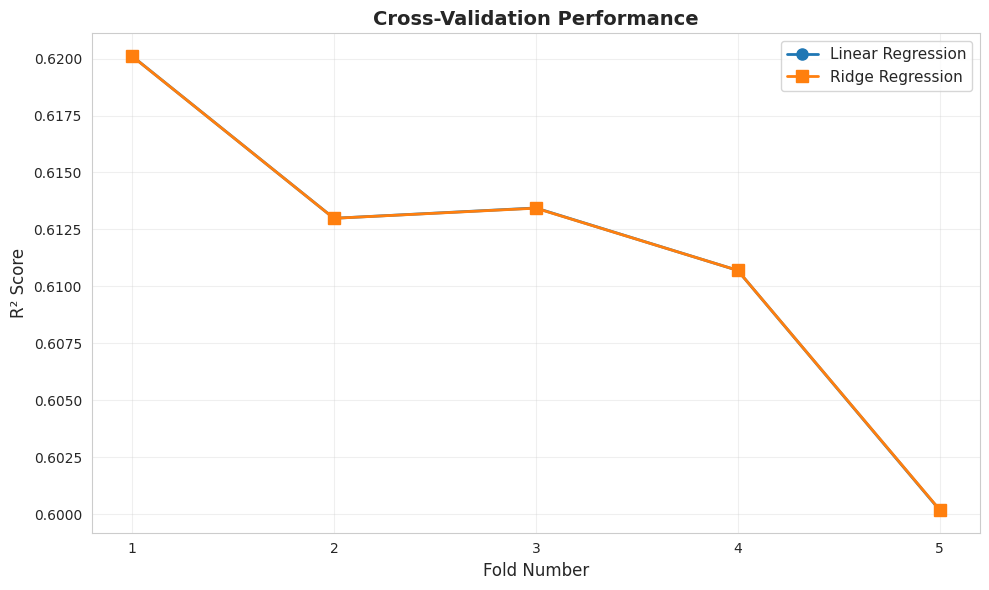

In [16]:
# Perform 5-fold cross-validation
lr_cv_scores = cross_val_score(LinearRegression(), X_train_scaled, y_train, 
                                cv=5, scoring='r2')
ridge_cv_scores = cross_val_score(Ridge(alpha=1.0), X_train_scaled, y_train, 
                                   cv=5, scoring='r2')

print("Cross-Validation Results (R² Score):")
print(f"\nLinear Regression:")
print(f"  Scores: {lr_cv_scores}")
print(f"  Mean: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")

print(f"\nRidge Regression:")
print(f"  Scores: {ridge_cv_scores}")
print(f"  Mean: {ridge_cv_scores.mean():.4f} (+/- {ridge_cv_scores.std() * 2:.4f})")

# Visualize CV scores
plt.figure(figsize=(10, 6))
x = np.arange(1, 6)
plt.plot(x, lr_cv_scores, marker='o', linewidth=2, markersize=8, label='Linear Regression')
plt.plot(x, ridge_cv_scores, marker='s', linewidth=2, markersize=8, label='Ridge Regression')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Cross-Validation Performance', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(x)
plt.tight_layout()
plt.show()

## 🎯 Key Takeaways

1. **Linear Regression**:
   - Simple and interpretable
   - Works well when relationship is linear
   - Can overfit with many features

2. **Ridge Regression**:
   - Adds L2 regularization to prevent overfitting
   - Shrinks coefficients toward zero
   - Better when features are correlated
   - Alpha controls regularization strength

3. **Evaluation Metrics**:
   - **MSE/RMSE**: Penalizes large errors more
   - **MAE**: Average absolute error
   - **R²**: Proportion of variance explained (0-1)

4. **Feature Scaling**: Important for ridge regression and comparing coefficients

5. **Cross-Validation**: Provides more robust performance estimates

## 📝 Practice Exercise

Try modifying this code:
1. Use different alpha values for ridge regression
2. Try removing some features and see how it affects performance
3. Experiment with different train-test split ratios
4. Add polynomial features and see if performance improves

**Next**: Move to `exercise_01_regression.ipynb` for hands-on practice!